In [15]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt

# Increase size of map BEFORE Basemap()!!
plt.figure(figsize=(15,8))

# llcrnrlat,llcrnrlon,urcrnrlat,urcrnrlon
# are the lat/lon values of the lower left and upper right corners
# of the map.
# resolution = 'c' means use crude resolution coastlines.
m = Basemap(projection='mill',llcrnrlat=-90,urcrnrlat=90,\
            llcrnrlon=-180,urcrnrlon=180,resolution='c')

m.fillcontinents(color='coral',lake_color='cadetblue')
m.drawcoastlines(linewidth=0.4)
m.drawcountries(linewidth=0.4, linestyle='solid', color='brown', antialiased=1, ax=None, zorder = None)
m.drawlsmask(linewidth=0.5)

# Ocean colour
m.drawmapboundary(fill_color='cadetblue')

# Meridians
m.drawmeridians(np.arange(-180.,181.,60.))
m.drawparallels(np.arange(-90.,91.,30.))

# Test for position
lon, lat = -104.237, 40.125
xpt, ypt = m(lon,lat)
lonpt, latpt = m(xpt, ypt, inverse=True)

m.plot(xpt, ypt, 'bo')
plt.text(xpt+100000,ypt+100000,'Boulder (%5.1fW,%3.1fN)' % (lonpt,latpt))

plt.title("Miller Cylindrical Projection")
plt.show()

In [3]:

country_data = m.readshapefile('../Data/gadm28', 'pipi')


In [ ]:
test = country_data[3]
print dir(test)


plt.title("Miller Cylindrical Projection")
plt.show()

In [16]:
%matplotlib inline

import shapefile          #pyshp
import dbflib
from matplotlib.collections import LineCollection
from matplotlib import cm
 
shp = ShapeFile(r"borders\ita_adm1")
dbf = dbflib.open(r"borders\ita_adm1")
 
for npoly in range(shp.info()[0]):
    shpsegs = []
    shpinfo = []
 
    shp_object = shp.read_object(npoly)
    verts = shp_object.vertices()
    rings = len(verts)
    for ring in range(rings):
        lons, lats = zip(*verts[ring])
        if max(lons) > 721. or min(lons) < -721. or max(lats) > 91. or min(lats) < -91:
            raise ValueError,msg
        x, y = m(lons, lats)
        shpsegs.append(zip(x,y))
        if ring == 0:
            shapedict = dbf.read_record(npoly)
        name = shapedict["NAME_1"]
        # add information about ring number to dictionary.
        shapedict['RINGNUM'] = ring+1
        shapedict['SHAPENUM'] = npoly+1
        shpinfo.append(shapedict)
    print name
    lines = LineCollection(shpsegs,antialiaseds=(1,))
    lines.set_facecolors(cm.jet(np.random.rand(1)))
    lines.set_edgecolors('k')
    lines.set_linewidth(0.3)
    ax.add_collection(lines)
 
plt.show()

ImportError: No module named dbflib

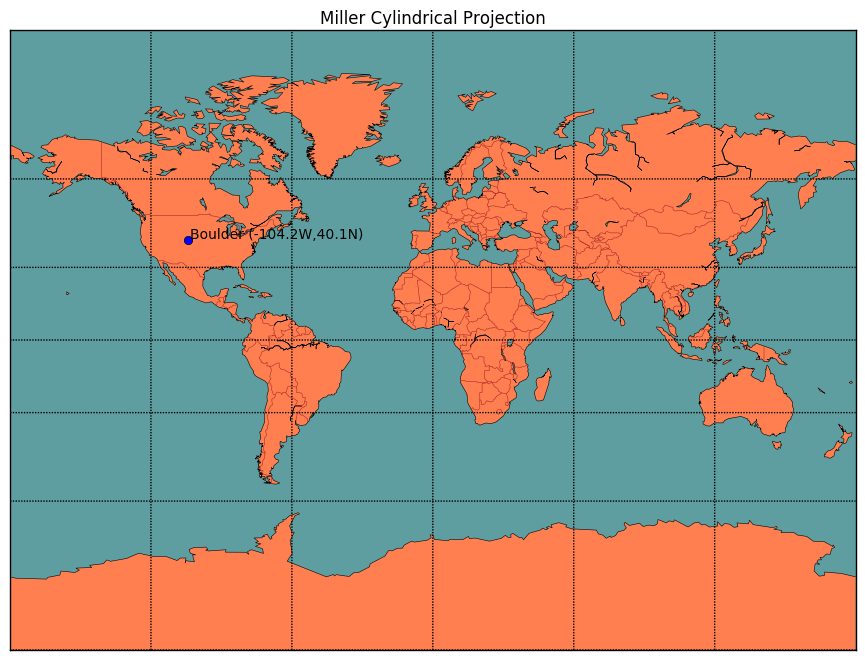

In [17]:
%matplotlib inline
#
# BaseMap example by geophysique.be
# tutorial 07
 
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
 
### PARAMETERS FOR MATPLOTLIB :
import matplotlib as mpl
mpl.rcParams['font.size'] = 10.
mpl.rcParams['font.family'] = 'Comic Sans MS'
mpl.rcParams['axes.labelsize'] = 8.
mpl.rcParams['xtick.labelsize'] = 6.
mpl.rcParams['ytick.labelsize'] = 6.
 
fig = plt.figure(figsize=(11.7,8.3))
#Custom adjust of the subplots
plt.subplots_adjust(left=0.05,right=0.95,top=0.90,bottom=0.05,wspace=0.15,hspace=0.05)
ax = plt.subplot(111)
#Let's create a basemap of Europe
x1 = -20.
x2 = 40.
y1 = 32.
y2 = 64.
 
m = Basemap(resolution='i',projection='merc', llcrnrlat=y1,urcrnrlat=y2,llcrnrlon=x1,urcrnrlon=x2,lat_ts=(x1+x2)/2)
m.drawcountries(linewidth=0.5)
m.drawcoastlines(linewidth=0.5)
m.drawparallels(np.arange(y1,y2,2.),labels=[1,0,0,0],color='black',dashes=[1,0],labelstyle='+/-',linewidth=0.2) # draw parallels
m.drawmeridians(np.arange(x1,x2,2.),labels=[0,0,0,1],color='black',dashes=[1,0],labelstyle='+/-',linewidth=0.2) # draw meridians
 
from shapelib import ShapeFile
import dbflib
from matplotlib.collections import LineCollection
from matplotlib import cm
 
shp = ShapeFile(r'../Data/gadm28')
dbf = dbflib.open(r'../Data/gadm28')


ImportError: No module named shapelib

ValueError: All values in the dash list must be positive

NameError: name 'shp' is not defined

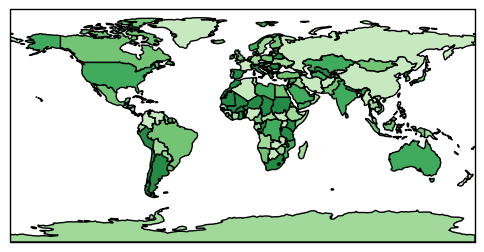

In [19]:
%matplotlib inline

import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.io.shapereader as shpreader
import itertools
import numpy as np

shapename = 'admin_0_countries'
countries_shp = shpreader.natural_earth(resolution='110m',
                                        category='cultural', name=shapename)

# some nice "earthy" colors
earth_colors = np.array([(199, 233, 192),
                                (161, 217, 155),
                                (116, 196, 118),
                                (65, 171, 93),
                                (35, 139, 69),
                                ]) / 255.
earth_colors = itertools.cycle(earth_colors)

ax = plt.axes(projection=ccrs.PlateCarree())

for country in shpreader.Reader(countries_shp).records():
    ax.add_geometries(country.geometry, ccrs.PlateCarree(),
                      facecolor=earth_colors.next())

plt.show()

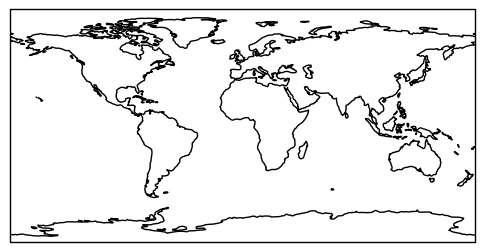

In [20]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

plt.show()

Afghanistan
Angola
Albania
United Arab Emirates
Argentina
Armenia
Antarctica
French Southern and Antarctic Lands
Australia
Austria
Azerbaijan
Burundi
Belgium
Benin
Burkina Faso
Bangladesh
Bulgaria
Bahamas
Bosnia and Herzegovina
Belarus
Belize
Bolivia
Brazil
Brunei Darussalam
Bhutan
Botswana
Central African Republic
Canada
Switzerland
Chile
China
C�te d'Ivoire
Cameroon
Democratic Republic of the Congo
Republic of Congo
Colombia
Costa Rica
Cuba
Northern Cyprus
Cyprus
Czech Republic
Germany
Djibouti
Denmark
Dominican Republic
Algeria
Ecuador
Egypt
Eritrea
Spain
Estonia
Ethiopia
Finland
Fiji
Falkland Islands
France
Gabon
United Kingdom
Georgia
Ghana
Guinea
The Gambia
Guinea-Bissau
Equatorial Guinea
Greece
Greenland
Guatemala
Guyana
Honduras
Croatia
Haiti
Hungary
Indonesia
India
Ireland
Iran
Iraq
Iceland
Israel
Italy
Jamaica
Jordan
Japan
Kazakhstan
Kenya
Kyrgyzstan
Cambodia
Republic of Korea
Kosovo
Kuwait
Lao PDR
Lebanon
Liberia
Libya
Sri Lanka
Lesotho
Lithuania
Luxembourg
Latvia
Morocco
Mo

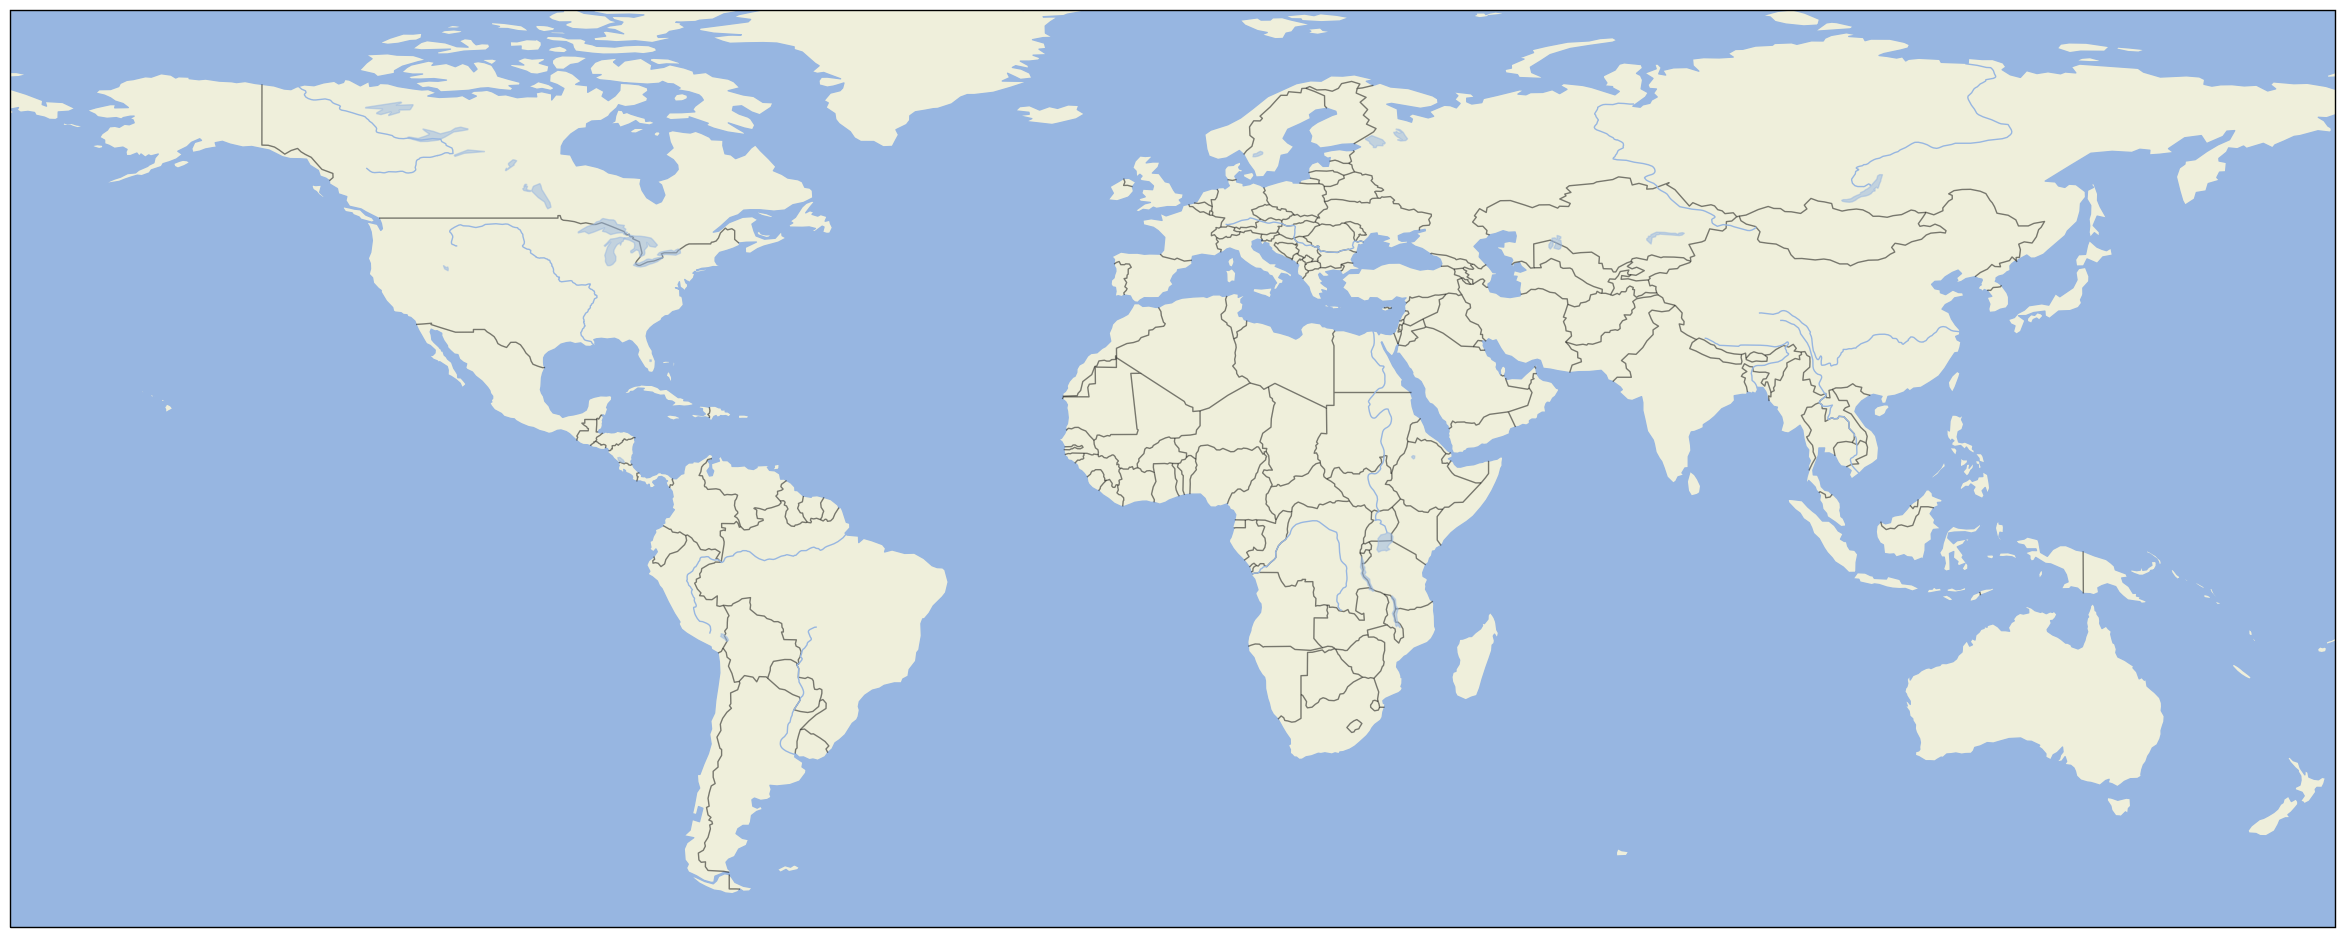

In [1]:
%matplotlib inline


import matplotlib.pyplot as plt
import cartopy
import cartopy.io.shapereader as shpreader
import cartopy.crs as ccrs

# Increase size of map BEFORE Basemap()!!
plt.figure(figsize=(30,18))


ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.BORDERS, linestyle='-', alpha=.5)
ax.add_feature(cartopy.feature.LAKES, alpha=0.5)
ax.add_feature(cartopy.feature.RIVERS)

ax.set_extent([-150, 60, -25, 60])

shpfilename = shpreader.natural_earth(resolution='110m',
                                      category='cultural',
                                      name='admin_0_countries')
reader = shpreader.Reader(shpfilename)
countries = reader.records()


"""
for country in countries:
    if country.attributes['name_long'] == 'France':
        ax.add_geometries(country.geometry, ccrs.PlateCarree(),
                          facecolor=('red'),
                          label=country.attributes['adm0_a3'])
    else:
        ax.add_geometries(country.geometry, ccrs.PlateCarree(),
                          facecolor=('beige'),
                          label=country.attributes['adm0_a3'])
"""



In [ ]:
#All attacks per country since beginning of data

#count_by_country = get_by_country(name)



for c in countries:
    temp = cnt_b_cntry.get(c.attributes['name_long'].lower(), false)
    # Loop thingy
    if temp:
        # 1 - 5
        if 0 <= temp and temp < 6:
            ax.add_geometries(country.geometry, ccrs.PlateCarree(), facecolor=('#0042e8'))
        # 6 - 20
        else if 6 <= temp and temp < 21:
            ax.add_geometries(country.geometry, ccrs.PlateCarree(), facecolor=('#3ce800'))
        # 21 - 100
        else if 21 <= temp and temp < 101:
            ax.add_geometries(country.geometry, ccrs.PlateCarree(), facecolor=('#f7e901'))
        # 101 - 500
        else if 101 <= temp and temp < 501:
            ax.add_geometries(country.geometry, ccrs.PlateCarree(), facecolor=('#ef8700'))
        # > 500
        else if 501 <= temp:
            ax.add_geometries(country.geometry, ccrs.PlateCarree(), facecolor=('#ee0009'))
    else:
        ax.add_geometries(country.geometry, ccrs.PlateCarree(), facecolor=('white'))

plt.title("Total of shark attacks globally")
plt.show()

In [ ]:
#PERCENTAGE OF FATALITY

for c in countries:
    temp = cnt_b_cntry.get(c.attributes['name_long'].lower(), false)
    # Loop thingy
    if temp:
        # low
        if 0 <= temp and temp < 6:
            ax.add_geometries(country.geometry, ccrs.PlateCarree(), facecolor=('#0042e8'))
        # low medium
        else if 6 <= temp and temp < 21:
            ax.add_geometries(country.geometry, ccrs.PlateCarree(), facecolor=('#3ce800'))
        # medium high
        else if 21 <= temp and temp < 101:
            ax.add_geometries(country.geometry, ccrs.PlateCarree(), facecolor=('#f7e901'))
        # high
        else if 101 <= temp and temp < 501:
            ax.add_geometries(country.geometry, ccrs.PlateCarree(), facecolor=('#ef8700'))
    else:
        ax.add_geometries(country.geometry, ccrs.PlateCarree(), facecolor=('white'))

plt.title("Percentage of fatal attacks")
plt.show()